In [ ]:
#convert to datetime series
# Prepare a format string: time_format
time_format = '%Y-%m-%d %H:%M'

# Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  

# Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)
print(time_series)

In [ ]:
#partial string indexing and slicing
# Extract the hour from 9pm to 10pm on '2010-10-11': ts1
ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']

# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['2010-07-04']

# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15':'2010-12-31']


In [ ]:
#reindexing
# Reindex without fill method: ts3
ts3 = ts2.reindex(ts1.index)

# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method='ffill')

# Combine ts1 + ts2: sum12
sum12 = ts1 + ts2

# Combine ts1 + ts3: sum13
sum13 = ts1 + ts3

# Combine ts1 + ts4: sum14
sum14 = ts1 + ts4
print(sum14)

In [ ]:
#Resampling time series data
# Downsample to 6 hour data and aggregate by mean: df1
df1 = df['Temperature'].resample('6H').mean()

# Downsample to daily data and count the number of data points: df2
df2 = df['Temperature'].resample('D').count()
print(df2)

In [ ]:
#method chaining
# Extract temperature data for August: august
august = df['Temperature'].loc['2010-08']

# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()

# Extract temperature data for February: february
february = df['Temperature'].loc['2010-02']

# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()

print(february_lows)

In [ ]:
#Rolling mean and frequency
# Extract data from 2010-Aug-01 to 2010-Aug-15: unsmoothed
unsmoothed = df['Temperature']['2010-08-01':'2010-08-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed': smoothed, 'unsmoothed': unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

In [ ]:
# Extract the August 2010 data: august
august = df['Temperature']['2010-08']

# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()
print(daily_highs_smoothed)

In [ ]:
#manipulating time series data
# Strip extra whitespace from the column names: df.columns
df.columns = df.columns.str.strip(' ')

# Extract data for which the destination airport is Dallas: dallas
dallas = df['Destination Airport'].str.contains('DAL')

# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample('D').sum()

# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()
print(stats)
print(daily_departures)

In [ ]:
# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate(how='linear')

# Compute the absolute difference of ts1 and ts2_interp: differences 
differences = np.abs(ts1 - ts2_interp)

# Generate and print summary statistics of the differences
print(differences.describe())

In [ ]:
#time zones conversion
# Build a Boolean mask to filter for the 'LAX' departure flights: mask
mask = df['Destination Airport'] == 'LAX'
#print(type(mask))

# Use the mask to subset the data: la
la = df[mask]

# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime( la['Date (MM/DD/YYYY)'] + ' ' + la['Wheels-off Time'] )

# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize('US/Central')

# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')

In [ ]:
# Plot the raw data before setting the datetime index
df.plot()
plt.show()

# Convert the 'Date' column into a collection of datetime objects: df.Date
df.Date = pd.to_datetime(df.Date)

# Set the index to be the converted 'Date' column
df.set_index('Date', inplace=True)

# Re-plot the DataFrame to see that the axis is now datetime aware!
df.plot()
plt.show()

In [ ]:
# Plot the summer data
df.Temperature['2010-06':'2010-08'].plot()
plt.show()
plt.clf()

# Plot the one week data
df.Temperature['2010-06-10':'2010-06-17'].plot()
plt.show()
plt.clf()


In [5]:
# Import pandas as pd
import pandas as pd

# Read the data from file using read_csv
climate_change = pd.read_csv('datasets/climate_change.csv', parse_dates=[0], index_col=[0])
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


In [6]:
climate_change.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 706 entries, 1958-03-06 to 2016-12-06
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   co2            699 non-null    float64
 1   relative_temp  706 non-null    float64
dtypes: float64(2)
memory usage: 16.5 KB


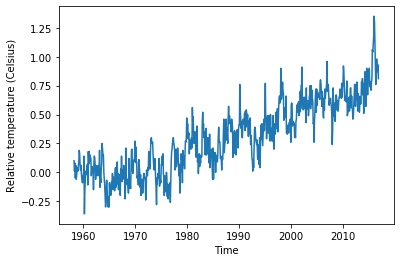

In [7]:
#plotting time series
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

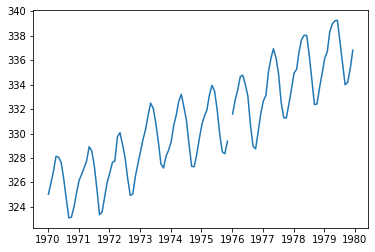

In [8]:
#Using a time index to zoom in on a particular period within the time-series
import matplotlib.pyplot as plt

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01": "1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

### Plotting time-series with different variables

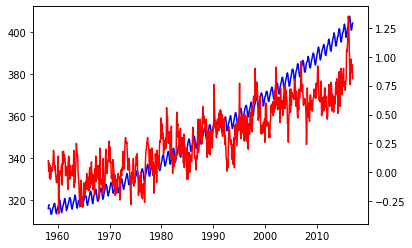

In [9]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='b')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')

plt.show()

In [10]:
#create a function
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

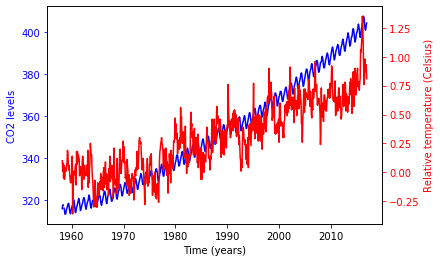

In [12]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", "Time (years)", "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", "Time (years)", "Relative temperature (Celsius)")

plt.show()